In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import scipy.stats as st
import seaborn as sns
import statsmodels.api as sm
from datetime import datetime
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
from pmdarima.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.stattools import acf
from numpy import inf

from IPython.display import display, HTML
display(HTML(""" <style> .output {display: center; align-items: left; text-align: center; justify-content: center; } </style> """))

In [2]:
#Importación de datos
#data = pd.read_excel('Generación Intermitente de la GCROC 2013-2019.xlsx', header=1)
datos = pd.read_excel('plantas_intermitentes_clean.xlsx', header=1)
datos.head()

,Unnamed: 0,dia_semana,fecha,hora,GICIE301,GICIE302,GICIE303,GICIE304,GICIE305,GICIS306,...,GICIS308,GICIS309,GICIS310,GICIS311,GICIS312,GICIS313,GICIS314,GICIS315,GICIS316,fecha_hora
0,1,jueves,2013-11-14,1,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-11-14 01:00:00
1,2,jueves,2013-11-14,2,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-11-14 02:00:00
2,3,jueves,2013-11-14,3,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-11-14 03:00:00
3,4,jueves,2013-11-14,4,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-11-14 04:00:00
4,5,jueves,2013-11-14,5,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-11-14 05:00:00


In [3]:
datos.tail()

,Unnamed: 0,dia_semana,fecha,hora,GICIE301,GICIE302,GICIE303,GICIE304,GICIE305,GICIS306,...,GICIS308,GICIS309,GICIS310,GICIS311,GICIS312,GICIS313,GICIS314,GICIS315,GICIS316,fecha_hora
46819,46820,lunes,2019-03-18,20,31368,36054.0,51098.0,80381.0,108298.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-03-18 20:00:00
46820,46821,lunes,2019-03-18,21,31368,106540.0,78322.0,62865.0,91574.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-03-18 21:00:00
46821,46822,lunes,2019-03-18,22,45247,103049.0,75092.0,61188.0,57110.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-03-18 22:00:00
46822,46823,lunes,2019-03-18,23,25575,92652.0,80384.0,60256.0,29338.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-03-18 23:00:00
46823,46824,lunes,2019-03-18,24,6344,120661.0,83692.0,35103.0,13816.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-03-19 00:00:00


In [4]:
#LIMPIEZA DE DATOS
datos = datos.set_index(datos['fecha_hora'])
datos = datos[36216:]
datos

,Unnamed: 0,dia_semana,fecha,hora,GICIE301,GICIE302,GICIE303,GICIE304,GICIE305,GICIS306,...,GICIS308,GICIS309,GICIS310,GICIS311,GICIS312,GICIS313,GICIS314,GICIS315,GICIS316,fecha_hora
fecha_hora,,,,,,,,,,,,,,,,,,,,,
2018-01-01 01:00:00,36217,lunes,2018-01-01,1,15550,47651.0,19313.0,342.0,8868.0,0.0,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-01 01:00:00
2018-01-01 02:00:00,36218,lunes,2018-01-01,2,25937,85267.0,29844.0,5364.0,9127.0,0.0,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-01 02:00:00
2018-01-01 03:00:00,36219,lunes,2018-01-01,3,28057,57139.0,11917.0,21413.0,12900.0,0.0,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-01 03:00:00
2018-01-01 04:00:00,36220,lunes,2018-01-01,4,40384,90004.0,35866.0,32420.0,29551.0,0.0,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-01 04:00:00
2018-01-01 05:00:00,36221,lunes,2018-01-01,5,43275,110309.0,81132.0,30585.0,37663.0,0.0,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-01 05:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-03-18 20:00:00,46820,lunes,2019-03-18,20,31368,36054.0,51098.0,80381.0,108298.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-03-18 20:00:00
2019-03-18 21:00:00,46821,lunes,2019-03-18,21,31368,106540.0,78322.0,62865.0,91574.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-03-18 21:00:00
2019-03-18 22:00:00,46822,lunes,2019-03-18,22,45247,103049.0,75092.0,61188.0,57110.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-03-18 22:00:00


In [5]:
columns = ['GICIE301','GICIE302', 'GICIE303', 'GICIE304', 'GICIE305', 'GICIS306', 'GICIS307','GICIS308', 
           'GICIS309', 'GICIS310', 'GICIS311', 'GICIS312', 'GICIS313','GICIS314', 'GICIS315', 'GICIS316']
len(columns)

16

In [6]:
datos['GICIE301']

fecha_hora
2018-01-01 01:00:00    15550
2018-01-01 02:00:00    25937
2018-01-01 03:00:00    28057
2018-01-01 04:00:00    40384
2018-01-01 05:00:00    43275
                       ...  
2019-03-18 20:00:00    31368
2019-03-18 21:00:00    31368
2019-03-18 22:00:00    45247
2019-03-18 23:00:00    25575
2019-03-19 00:00:00     6344
Name: GICIE301, Length: 10608, dtype: int64

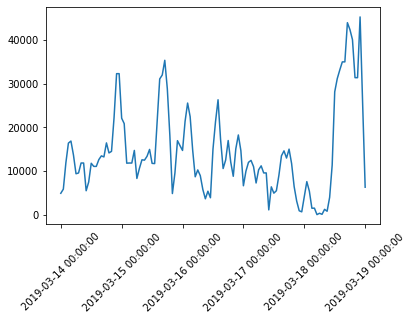

In [7]:
plt.plot(datos['GICIE301'][-1-5*24:])
plt.xticks([0,24,48,72,96,120],rotation=45)
plt.show()

In [8]:
def mape(forecast, actual):
    return np.mean(np.abs((forecast - actual)/actual))  # MAPE

In [9]:
def AIC_accuracy(train,test):
    fcc = []
    for i in range(1,25):
        data = train['Hora '+str(i)].dropna()
        model = pm.auto_arima(data.values, start_p=1, start_q=1,
                          test='adf',       # use adftest to find optimal 'd'
                          max_p=3, max_q=3, # maximum p and q
                          m=12,              # frequency of series
                          d=None,           # let model determine 'd'
                          seasonal=False,   # No Seasonality
                          start_P=0, 
                          D=0, 
                          trace=False,
                          error_action='ignore',  
                          suppress_warnings=True, 
                          stepwise=True)
        #model.fit(data.values)
        #print(model)
        #model.plot_diagnostics(figsize=(7,5))
        #plt.show()
        # Predicción
        fc, confint = model.predict(n_periods=5, return_conf_int=True)
        fcc.append(fc)
    return(fcc, model)

In [10]:
def mape_prom_edited(columna):
    
    data2 = datos[['hora',columna]]
    data2[columna] = (data2[columna]+1) # para efectos de las tranformaciones logaritmicas(eliminar el 0)
    #data2 = data2.dropna()

    #Se separará por hora del día, ya que cada hora se comporta diferente.
    xhr = pd.DataFrame() ; log = pd.DataFrame() ; rends = pd.DataFrame() ; rlogs = pd.DataFrame()
    ano,dia,hora= str(data2.index[1])[0:4], str(data2.index[1])[5:7] ,str(data2.index[1])[8:10]

    #El siguiente ciclo 'for' crea un DataFrame acomodado por horas, de cada planta de generación.
    for i in range(1,25):
        hrs = [data2.iloc[j][1] for j in range(len(data2)) if data2.iloc[j][0] == i ] #pd.Series()
        xhr['Hora '+str(i)] = hrs

    #Se va a trabajar con logaritmicos, porque esta transformación no afecta el vlaor, sino solo su rango.
    log = np.log(xhr)

    #Se le cambia el index a los DataFrame creados, por las fechas que son.
    xhr = xhr.set_index(pd.date_range(start=datos['fecha'][0],end=datos['fecha'][-1],freq='d'))

    #Seleccion de y_train y y_test
    test = (xhr.iloc[-5:,:])-1   # INFO DE TEST
    train = log.drop(log.index[1945:]) # QUITANDO TEST PARA TRAIN

    fcc = []

    #MODELO ARIMA
    for i in range(1,25):
        y_train = train['Hora '+str(i)].dropna()
        model = pm.auto_arima(y_train.values, start_p=1, start_q=1,
            test='adf',       # use adftest to find optimal 'd'
            max_p=3, max_q=3, # maximum p and q
            m=12,              # frequency of series
            d=None,           # let model determine 'd'
            seasonal=True)   # No Seasonality

        model.fit(y_train.values)
        #print(model)
        #model.plot_diagnostics(figsize=(7,5))
        #plt.show()
            
        # Predicción
        fc, confint = model.predict(n_periods=len(test), return_conf_int=True)
        fcc.append(fc)
        
    fc, model = AIC_accuracy(train,test)
    mapes = [mape(fc[i-1], np.log(test['Hora '+str(i)])) for i in range(1,25)]
    mapes = pd.DataFrame(mapes).dropna()
    mape_promedio = np.mean(mapes)
    dias = []
    for j in range(0,5):
        dias.append([np.exp([ fc[i][j] for i in range(len(fc))])][0])
    pronostico = pd.DataFrame(np.concatenate(dias))
    pronostico = pronostico.set_index(pd.date_range(pd.datetime(2019,3,14),periods=len(pronostico),freq='H'))
    pronostico.index = pronostico.index.map(str)

    arange_dates = []
    arange_no = []
    arange = data2[columna][-1-19*24:].index
    for i in range(0,len(arange),48):
        arange_dates.append(arange[i])
        arange_no.append(i)

    plt.figure(figsize=(12,5), dpi=100)
    plt.plot(data2[columna][-1-19*24:], label = 'Datos Reales')
    plt.plot(pronostico, label='pronostico')
    plt.title('Predicción vs Reales 5 dias '+columna)
    plt.xticks(arange_no,arange_dates,rotation = 45)
    plt.legend(loc='upper left', fontsize=8)
    plt.show()
    
    print(mape_promedio)
    #print(fc)
    #print(model)
    
    print(mape)

In [11]:
def mape_prom_edited2(columna):
    
    data2 = datos[['hora',columna]]
    data2[columna] = (data2[columna]+1) # para efectos de las tranformaciones logs (eliminar el 0)
    #data2 = data2.dropna()

    #Se separará por hora del día, ya que cada hora se comporta diferente.
    xhr = pd.DataFrame() ; log = pd.DataFrame() ; rends = pd.DataFrame() ; rlogs = pd.DataFrame()
    ano,dia,hora= str(data2.index[1])[0:4], str(data2.index[1])[5:7] ,str(data2.index[1])[8:10]

    #El siguiente ciclo 'for' crea un DataFrame acomodado por horas, de cada planta de generación.
    for i in range(1,25):
        hrs = [data2.iloc[j][1] for j in range(len(data2)) if data2.iloc[j][0] == i ] #pd.Series()
        xhr['Hora '+str(i)] = hrs

    #Se va a trabajar con logs, porque esta transformación no afecta el vlaor, sino solo su rango.
    log = xhr

    #Se le cambia el index a los DataFrame creados, por las fechas que son.
    xhr = xhr.set_index(pd.date_range(start=datos['fecha'][0],end=datos['fecha'][-1],freq='d'))

    #Seleccion de y_train y y_test
    test = (xhr.iloc[-15:,:])-1   # INFO DE TEST
    train = log.drop(log.index[1945:]) # QUITANDO TEST PARA TRAIN

    fcc = []

    #MODELO ARIMA
    for i in range(1,25):
        y_train = train['Hora '+str(i)].dropna()
        model = pm.auto_arima(y_train.values, start_p=1, start_q=1,
            test='adf',       # use adftest to find optimal 'd'
            max_p=5, max_q=5, # maximum p and q
            m=1,              # frequency of series
            d=None,           # let model determine 'd'
            seasonal=True)   # No Seasonality

        model.fit(y_train.values)
        #print(model)
        #model.plot_diagnostics(figsize=(7,5))
        #plt.show()
            
        # Predicción
        fc, confint = model.predict(n_periods=len(test), return_conf_int=True)
        fcc.append(fc)
        
    fc, model = AIC_accuracy(train,test)
    mapes = [mape(fcc[i-1], (test['Hora '+str(i)])) for i in range(1,25)]
    mapes = pd.DataFrame(mapes).dropna()
    mapes[mapes == inf] = 0
    mape_promedio = np.mean(mapes)
    dias = []
    for j in range(0,5):
        dias.append([([ fc[i][j] for i in range(len(fc))])][0])
    pronostico = pd.DataFrame(np.concatenate(dias))
    pronostico = pronostico.set_index(pd.date_range(pd.datetime(2019,3,14),
                                                    periods=len(pronostico),freq='H'))
    pronostico.index = pronostico.index.map(str)

    arange_dates = []
    arange_no = []
    arange = data2[columna][-1-19*24:].index
    for i in range(0,len(arange),48):
        arange_dates.append(arange[i])
        arange_no.append(i)

    plt.figure(figsize=(12,5), dpi=100)
    plt.plot(data2[columna][-1-19*24:], 'o-', label = 'Datos Reales')
    plt.plot(pronostico, 'o--', label='pronostico',color ='r')
    plt.title('Predicción vs Reales 5 dias '+columna)
    plt.xticks(arange_no,arange_dates,rotation = 45)
    plt.legend(loc='upper left', fontsize=8)
    plt.show()
    
    print(mape_promedio)
    
    print(mape)

In [12]:
columns[5]

'GICIS306'

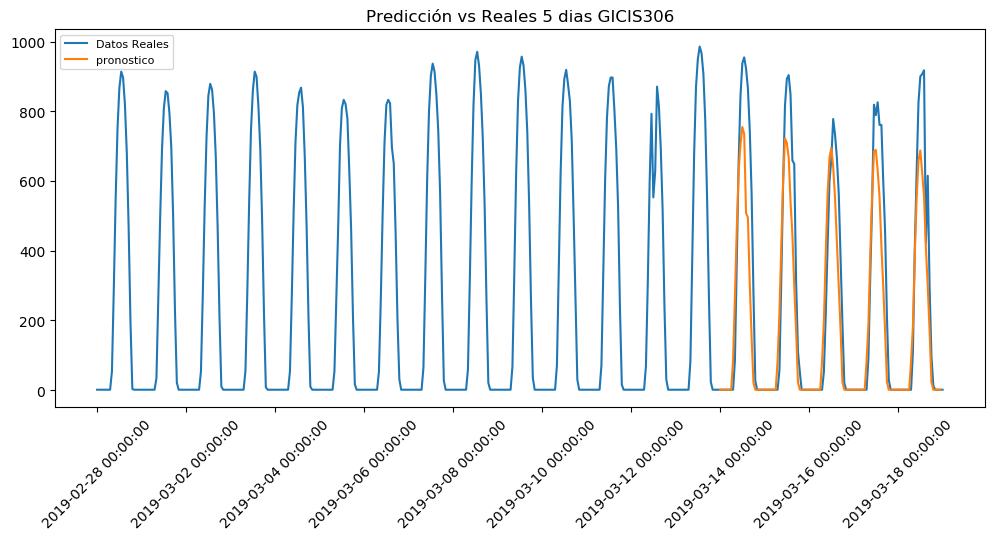

0    0.055926
dtype: float64
<function mape at 0x108bbe0e0>


In [13]:
prueba1 = mape_prom_edited(columns[5])
prueba1

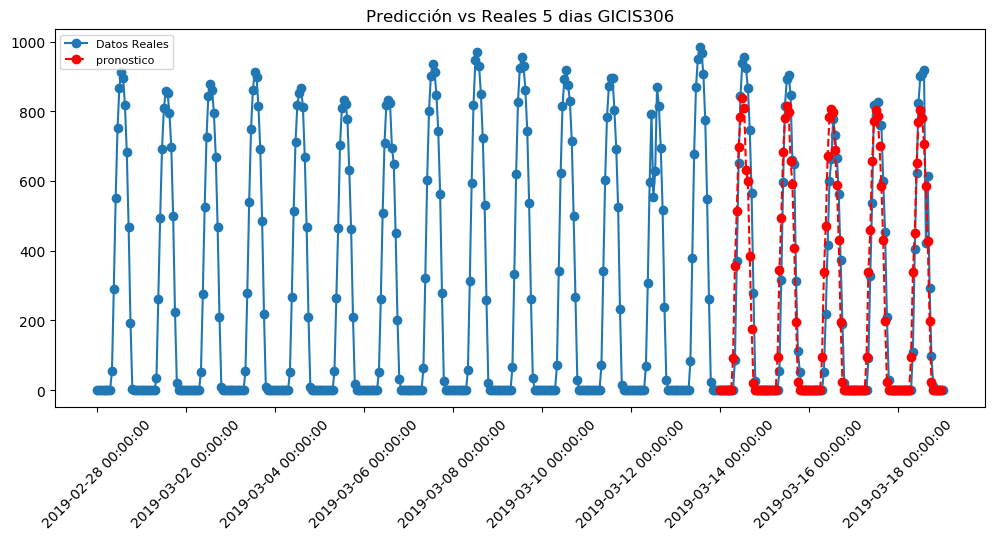

0    0.105321
dtype: float64
<function mape at 0x108bbe0e0>


In [14]:
prueba1 = mape_prom_edited2(columns[5])
prueba1

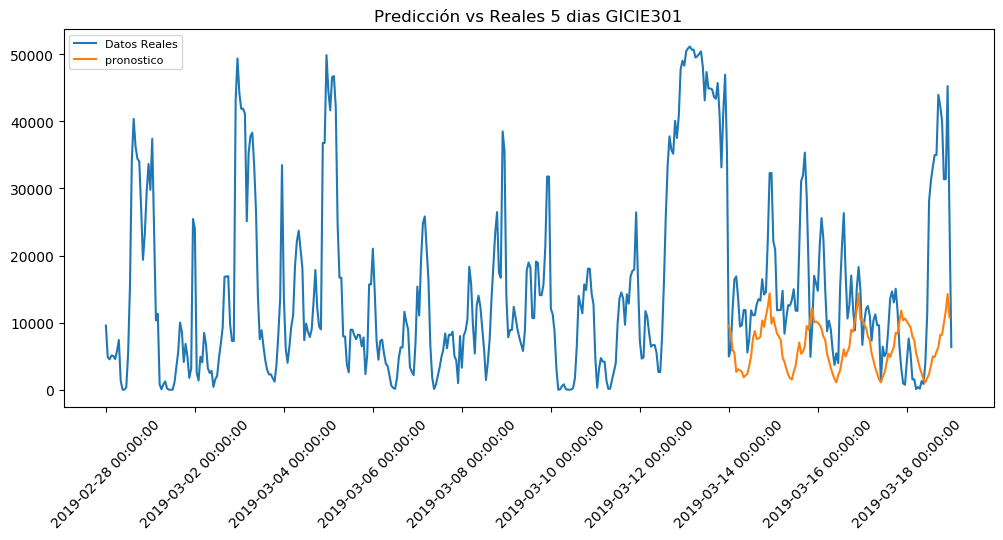

0    0.122932
dtype: float64
<function mape at 0x108bbe0e0>


[None]

In [15]:
prueba1 = [mape_prom_edited(columns[i]) for i in range(0,1)]
prueba1

In [ ]:
eolicas = [mape_prom_edited(columns[i]) for i in range(0,2)]
eolicas

In [ ]:
solares = [mape_prom_edited(columns[i]) for i in range(5,17)]
solares

In [ ]:
#La unica planta que no corre es GICIS312.